In [1]:
import numpy as np
from model import Model
import torch
from torch.utils.data import DataLoader
from celeba_dataset import CelebaDataset, IMG_SHAPE, data_transforms

import matplotlib.pyplot as plt

In [271]:
DATA_DIR = '../data'
MODEL_PATH = '../models/attempt20/epoch16'
ANNOTATION_DATA_PATH = f'{DATA_DIR}/list_attr_celeba.csv'
DATA_PATH = f'{DATA_DIR}/img_align_celeba'


In [270]:
dataset = CelebaDataset(ANNOTATION_DATA_PATH, DATA_PATH, transform=data_transforms)
all_labels = np.array(list(dataset.labels))


In [272]:
m = Model.load(MODEL_PATH)
#m = torch.load(MODEL_PATH, map_location=torch.device('cpu'))
#m = Model(VAE_PARAMS)

Model parameters: 11338979


In [273]:
def reconstruction(dataset, example_count=8):
    dataloader = DataLoader(dataset, example_count, shuffle=True)
    data_x, data_y = next(iter(dataloader))
    decoded = m.transform(data_x, data_y).detach().numpy()
    print(decoded.shape)
    print(all_labels)
    fig, ax = plt.subplots(example_count, 2, figsize=(10, 10))
    for i in range(example_count):
        pic, labels = data_x[i], data_y[i]
        l_i = list(map(lambda z: bool(z), labels.numpy()))
        labels_txt = ', '.join(all_labels[l_i])
        ax[i, 0].imshow(np.moveaxis(np.array(pic), 0, -1))
        ax[i, 0].set_title(labels_txt)
        ax[i, 0].axis('off')
        # print(pic)
        # print(decoded[i])
        ax[i, 1].imshow(np.moveaxis(decoded[i], 0, -1))
        #ax[i, 1].set_title(labels_txt)
        ax[i, 1].axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(5, 3, 128, 128)
['5_o_Clock_Shadow' 'Arched_Eyebrows' 'Attractive' 'Bags_Under_Eyes'
 'Bald' 'Bangs' 'Big_Lips' 'Big_Nose' 'Black_Hair' 'Blond_Hair' 'Blurry'
 'Brown_Hair' 'Bushy_Eyebrows' 'Chubby' 'Double_Chin' 'Eyeglasses'
 'Goatee' 'Gray_Hair' 'Heavy_Makeup' 'High_Cheekbones' 'Male'
 'Mouth_Slightly_Open' 'Mustache' 'Narrow_Eyes' 'No_Beard' 'Oval_Face'
 'Pale_Skin' 'Pointy_Nose' 'Receding_Hairline' 'Rosy_Cheeks' 'Sideburns'
 'Smiling' 'Straight_Hair' 'Wavy_Hair' 'Wearing_Earrings' 'Wearing_Hat'
 'Wearing_Lipstick' 'Wearing_Necklace' 'Wearing_Necktie' 'Young']


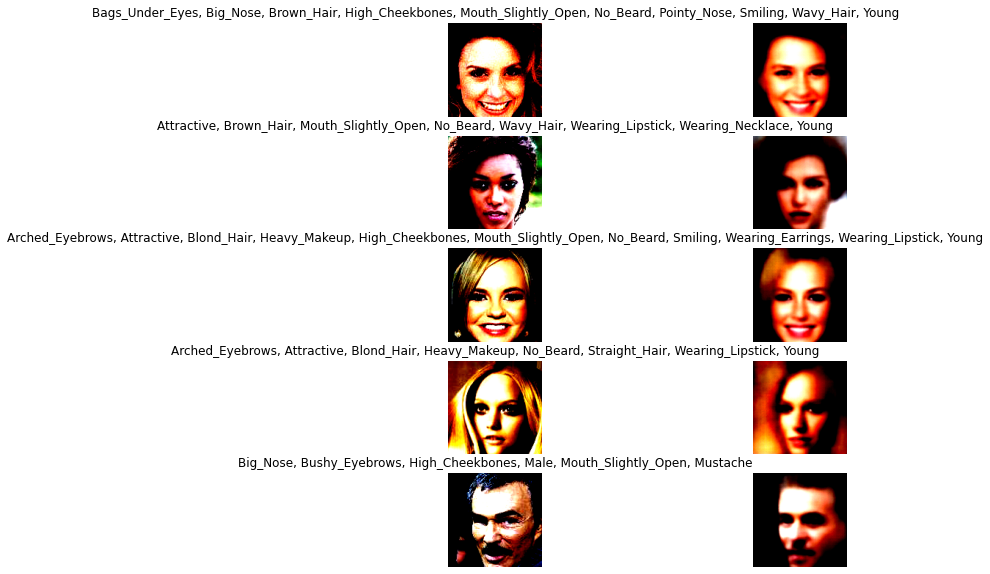

In [274]:
reconstruction(dataset, 5)

In [275]:
def creation(labels):
    labels_encoded = [[1 if l in labels else 0 for l in all_labels]]
    generated = m.generate_random_with_label(labels_encoded).detach().numpy()[0]
    #print(generated)
    plt.imshow(np.moveaxis(generated, 0, -1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


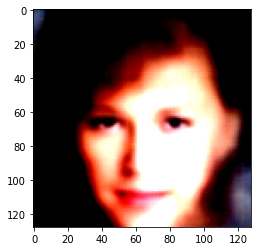

In [317]:
creation([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


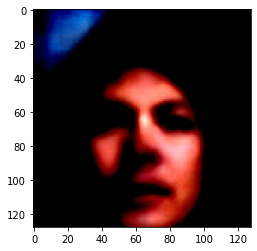

In [327]:
creation(['Mustache'])

In [208]:
print(dataset.labels)

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')


In [53]:
def latent_space_visualization(dataset, example_count=200):
    dataloader = DataLoader(dataset, example_count, shuffle=True)
    data_x, data_y = next(iter(dataloader))
    latent = m.conditional_vae(data_x, data_y)[3].detach().numpy()
    latent_size = latent.shape[1]
    sampled = np.random.normal(size=(example_count, latent_size))
    fig, ax = plt.subplots(latent_size // 2, 2, figsize=(10, 1 * latent_size))
    for i in range(latent_size):
        dim = latent[:, i]
        ax[i // 2, i % 2].hist(dim, alpha=0.5, color='green')
        sampled_dim = sampled[:, i]
        ax[i // 2, i % 2].hist(sampled_dim, alpha=0.5, color='blue')
    plt.show()

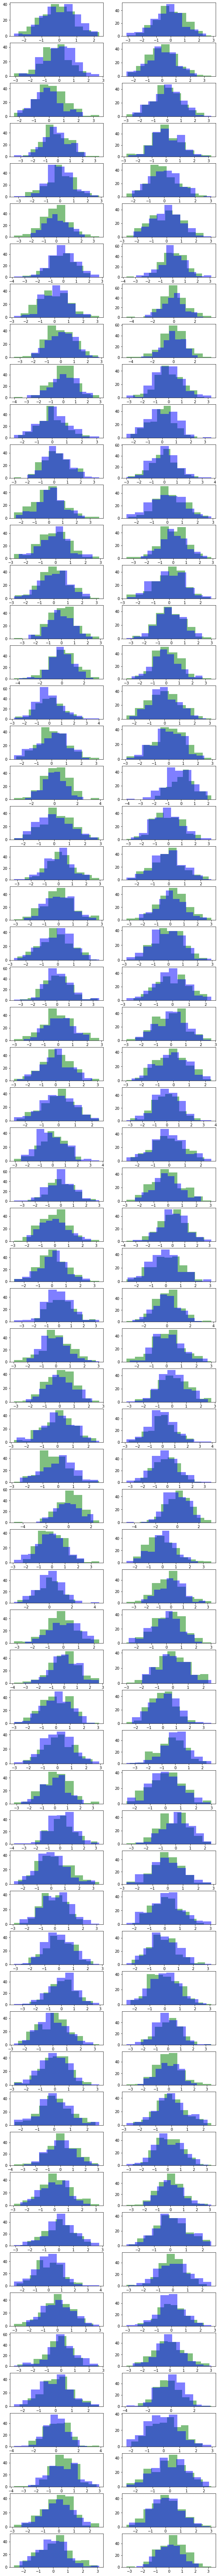

In [54]:
latent_space_visualization(dataset, example_count=200)

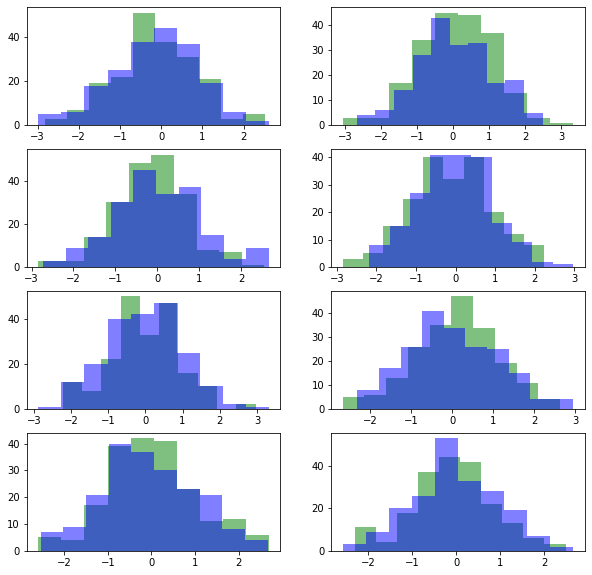

In [219]:

latent_space_visualization(dataset, example_count=200)

<AxesSubplot:>

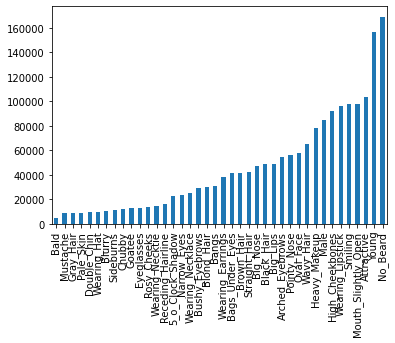

In [150]:
#dataset.img_labels_df.set_index('id', inplace=True)
dataset.img_labels_df.sum().sort_values().plot.bar()